In [1]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt, font_manager as fm
import matplotlib.font_manager as font_manager
from subset_select_entropic_FISTA_git import round_transpoly as round_transpoly
from subset_select_entropic_FISTA_git import feasible_proj as feasible_proj
from subset_select_entropic_FISTA_git import subset_select_FISTA as subset_select_FISTA
from subset_select_IPOT import subset_select_ipot as ss_ipot
from subset_select_ipot_non_uniform_git import subset_select_ipot as ss_ipot_non_uniform
from subset_select_non_uniform_entropic_FISTA_git import subset_select_non_uniform_FISTA as ss_non_uniform

from numpy.random import default_rng
from sklearn.cluster import KMeans
from matplotlib import image as image
from mpl_toolkits.mplot3d import Axes3D


# Color Transfer Examples 

# Corn and Peppers

$\mathbf{X} \rightarrow peppers \\
\mathbf{Y} \rightarrow corn$

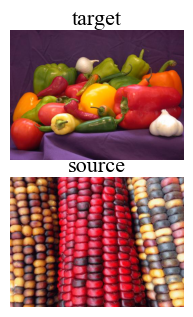

In [2]:
# img1 is target image
# img2 is source image

# csfont = {'fontname': 'Times New Roman', 'fontweight': 'bold', 'size': 16}
csfont = {'fontname': 'Times New Roman', 'size': 16}
fig, axs = plt.subplots(2, 1, figsize=(3, 3.6))
fig.subplots_adjust(hspace=0.13, wspace=0.01, right=1, left=-1)

# plt.subplots_adjust(top = 0.1, bottom = 0.05, right = 1, left = 0, hspace = 0, wspace = 0)
axs = axs.ravel()
img1 = image.imread("peppers.jpg")
img2 = image.imread("corn.jpg")


axs[0].imshow(img1)
axs[0].axis("off")
axs[0].set_title("target", **csfont, pad=-2)
# axs[0].set_box_aspect(1)

axs[1].imshow(np.swapaxes(img2, 0, 1))
axs[1].axis("off")
axs[1].set_title("source", **csfont, pad=-2)
# axs[1].set_box_aspect(1)

fig.savefig("peppers_to_corn.pdf", dpi=500, bbox_inches = 'tight',  format='pdf')
fig.savefig("peppers_to_corn.svg", dpi=500, bbox_inches = 'tight', format='svg')
fig.savefig("peppers_to_corn.png", dpi=500, bbox_inches='tight', format='png')


In [3]:
n_colors1 = 128
n_colors2 = 128
img1_ = img1.reshape(-1, 3)/255
img1_clusters = KMeans(n_clusters=n_colors1, n_init=1,
                       max_iter=100,  random_state=42).fit(img1_)

hist_img1 = np.bincount(img1_clusters.labels_)
hist_img1 = hist_img1/np.sum(hist_img1)


img2_ = img2.reshape(-1, 3)/255
img2_clusters = KMeans(n_clusters=n_colors2, n_init=1, max_iter=100).fit(img2_)

hist_img2 = np.bincount(img2_clusters.labels_)
hist_img2 = hist_img2/np.sum(hist_img2)

centers_img1 = img1_clusters.cluster_centers_
centers_img2 = img2_clusters.cluster_centers_

c= 1
c= 1.25
c= 1.5
c= 1.75
c= 2
c= 4
c= 8
c= 16


<bound method Figure.show of <Figure size 800x350 with 8 Axes>>

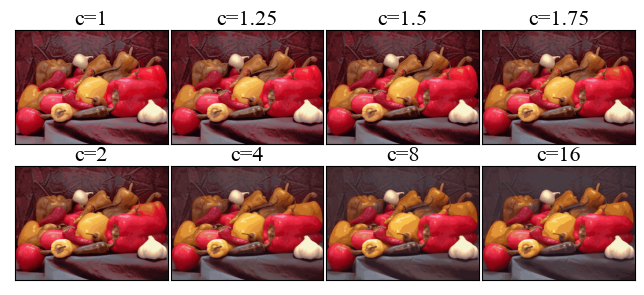

In [4]:
cs = [1, 1.25, 1.50, 1.75, 2, 4, 8, 16]
# cs = [1, 2, 4, 8, 16, 20, 24, 32]
fig1, axs1 = plt.subplots(2, 4, figsize=(8.0, 3.5))
fig1.subplots_adjust(hspace=0.02, wspace=0.02)
# params = {
#         #  'axes.labelsize': 10,
#          'axes.titlesize':12,
#          "font.family":"Times New Roman"
# }
# plt.rcParams.update(params)
csfont = {'fontname': 'Times New Roman', 'size': 16}
axs1 = axs1.ravel()
X = centers_img1
Y = centers_img2

mu = hist_img1
nu = hist_img2

lambd = 0.01
max_outer_iter = 500
max_inner_iter = 20

for k in range(0, len(cs)):
    c = cs[k]
    print("c=",c)
    _, P0, alph, bet = ss_ipot_non_uniform(X, Y, mu, nu, c, gamma = lambd, 
                                           max_outer_iter = max_inner_iter, max_inner_iter = max_inner_iter, return_map=True)
    P = np.copy(P0)

    r = np.sum(P, axis=1, keepdims=1)
    # c = np.sum(P,axis = 0, keepdims=1).T

    ratio_r = np.divide(P, r, np.ones_like(P), where=~np.isclose(r, 0))
    mapped_image1 = np.zeros(img1_.shape)
    centroid_mappings1 = (ratio_r@centers_img2)

    for i in range(0, centroid_mappings1.shape[0]):
        mapped_image1[img1_clusters.labels_ == i] = centroid_mappings1[i]

    axs1[k].imshow(mapped_image1.reshape(img1.shape))
    title = "$\\textit{c}$ = " + str(cs[k])
    axs1[k].xaxis.set_visible(False)
    axs1[k].yaxis.set_visible(False)
        # axs1[k].title.set_text(title)
    axs1[k].set_title("c="+str(c), **csfont, pad = 0)

fig1.savefig("peppers_to_corn_ipot.pdf", dpi=500, bbox_inches='tight', pad_inches=0, format='pdf')
fig1.savefig("peppers_to_corn_ipot.svg", dpi=500, bbox_inches='tight', pad_inches=0, format='svg')
fig1.savefig("peppers_to_corn_ipot.png", dpi=500, bbox_inches='tight', pad_inches=0, format='png')

fig1.show


$\mathbf{Y} \rightarrow peppers \\
\mathbf{X} \rightarrow corn$

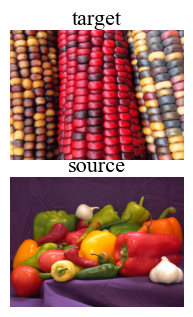

In [5]:
# img1 is target image
# img2 is source image

# csfont = {'fontname': 'Times New Roman', 'fontweight': 'bold', 'size': 16}
csfont = {'fontname': 'Times New Roman', 'size': 16}
fig, axs = plt.subplots(2, 1, figsize=(3, 3.6))
fig.subplots_adjust(hspace=0.13, wspace=0.01, right=1, left=-1)

# plt.subplots_adjust(top = 0.1, bottom = 0.05, right = 1, left = 0, hspace = 0, wspace = 0)
axs = axs.ravel()
img2 = image.imread("peppers.jpg")
img1 = image.imread("corn.jpg")
img1 = np.swapaxes(img1, 0, 1)


axs[0].imshow(img1)
axs[0].axis("off")
axs[0].set_title("target", **csfont, pad=-2)
# axs[0].set_box_aspect(1)

axs[1].imshow(img2)
axs[1].axis("off")
axs[1].set_title("source", **csfont, pad=-2)
# axs[1].set_box_aspect(1)

fig.savefig("corn_to_peppers.pdf", dpi=500, bbox_inches='tight',  format='pdf')
fig.savefig("corn_to_peppers.svg", dpi=500, bbox_inches='tight', format='svg')
fig.savefig("corn_to_peppers.png", dpi=500, bbox_inches='tight', format='png')


In [6]:
n_colors1 = 128
n_colors2 = 128
img1_ = img1.reshape(-1, 3)/255
img1_clusters = KMeans(n_clusters=n_colors1, n_init=1,
                       max_iter=100,  random_state=42).fit(img1_)

hist_img1 = np.bincount(img1_clusters.labels_)
hist_img1 = hist_img1/np.sum(hist_img1)


img2_ = img2.reshape(-1, 3)/255
img2_clusters = KMeans(n_clusters=n_colors2, n_init=1, max_iter=100).fit(img2_)

hist_img2 = np.bincount(img2_clusters.labels_)
hist_img2 = hist_img2/np.sum(hist_img2)

centers_img1 = img1_clusters.cluster_centers_
centers_img2 = img2_clusters.cluster_centers_


c= 1
c= 1.25
c= 1.5
c= 1.75
c= 2
c= 4
c= 8
c= 16


<bound method Figure.show of <Figure size 800x350 with 8 Axes>>

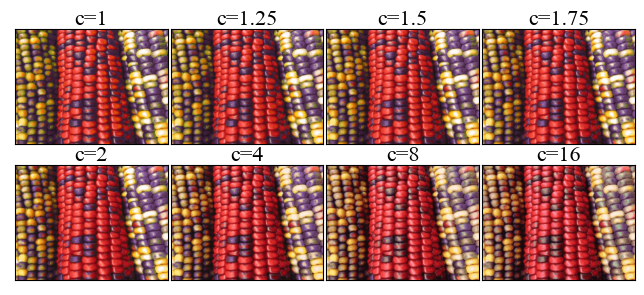

In [7]:
cs = [1, 1.25, 1.50, 1.75, 2, 4, 8, 16]
# cs = [1, 2, 4, 8, 16, 20, 24, 32]
fig1, axs1 = plt.subplots(2, 4, figsize=(8.0, 3.5))
fig1.subplots_adjust(hspace=0.02, wspace=0.02)
# params = {
#         #  'axes.labelsize': 10,
#          'axes.titlesize':12,
#          "font.family":"Times New Roman"
# }
# plt.rcParams.update(params)
csfont = {'fontname': 'Times New Roman', 'size': 16}
axs1 = axs1.ravel()
X = centers_img1
Y = centers_img2

mu = hist_img1
nu = hist_img2

lambd = 0.01
max_outer_iter = 500
max_inner_iter = 20

for k in range(0, len(cs)):
    c = cs[k]
    print("c=",c)
    _, P0, alph, bet = ss_ipot_non_uniform(X, Y, mu, nu, c, gamma = lambd, 
                                           max_outer_iter = max_inner_iter, max_inner_iter = max_inner_iter, return_map=True)
    P = np.copy(P0)

    r = np.sum(P, axis=1, keepdims=1)
    # c = np.sum(P,axis = 0, keepdims=1).T

    ratio_r = np.divide(P, r, np.ones_like(P), where=~np.isclose(r, 0))
    mapped_image1 = np.zeros(img1_.shape)
    centroid_mappings1 = (ratio_r@centers_img2)

    for i in range(0, centroid_mappings1.shape[0]):
        mapped_image1[img1_clusters.labels_ == i] = centroid_mappings1[i]

    axs1[k].imshow(mapped_image1.reshape(img1.shape))
    title = "$\\textit{c}$ = " + str(cs[k])
    axs1[k].xaxis.set_visible(False)
    axs1[k].yaxis.set_visible(False)
        # axs1[k].title.set_text(title)
    axs1[k].set_title("c="+str(c), **csfont, pad = 0)

fig1.savefig("corn_to_peppers_ipot.pdf", dpi=500, bbox_inches='tight', pad_inches=0, format='pdf')
fig1.savefig("corn_to_peppers_ipot.svg", dpi=500, bbox_inches='tight', pad_inches=0, format='svg')
fig1.savefig("corn_to_peppers_ipot.png", dpi=500,
             bbox_inches='tight', pad_inches=0, format='png')

fig1.show


# Woods-Autumn 

$\mathbf{X} \rightarrow Woods \\
\mathbf{Y} \rightarrow Autumn$

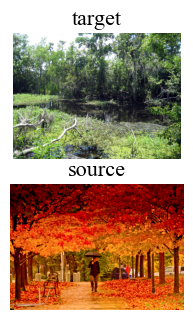

In [8]:
# img1 is target imgage
# img2 is source image

fig, axs = plt.subplots(2, 1, figsize=(3, 3.6))
fig1.subplots_adjust(hspace=0.05, wspace=0.05)

axs = axs.ravel()
img1 = image.imread("woods.jpg")
img2 = image.imread("autumn.jpg")


font = font_manager.FontProperties(family="Times New Roman",
                                   weight='normal',
                                   style='normal', size=16)
# csfont = {'fontname': 'Times New Roman', 'fontsize': 14}
# csfont = {'fontname': 'Times New Roman', 'size': 16}

axs[0].imshow(img1)
axs[0].axis("off")
axs[0].set_title("target", **csfont)
# axs[0].set_box_aspect(1)

axs[1].imshow(img2)
axs[1].axis("off")
axs[1].set_title("source", **csfont)
# axs[1].set_box_aspect(1)

fig.savefig("woods_to_autumn.pdf", dpi=500, bbox_inches='tight', pad_inches=0,  format='pdf')
fig.savefig("woods_to_autumn.svg", dpi=500, bbox_inches='tight', pad_inches=0,  format='svg')
fig.savefig("woods_to_autumn.png", dpi=500, bbox_inches='tight', pad_inches=0,  format='png')


In [9]:
n_colors1 = 128
n_colors2 = 128
img1_ = img1.reshape(-1, 3)/255
img1_clusters = KMeans(n_clusters=n_colors1, n_init=1,
                       max_iter=100,  random_state=42).fit(img1_)

hist_img1 = np.bincount(img1_clusters.labels_)
hist_img1 = hist_img1/np.sum(hist_img1)


img2_ = img2.reshape(-1, 3)/255
img2_clusters = KMeans(n_clusters=n_colors2, n_init=1, max_iter=100).fit(img2_)

hist_img2 = np.bincount(img2_clusters.labels_)
hist_img2 = hist_img2/np.sum(hist_img2)

centers_img1 = img1_clusters.cluster_centers_
centers_img2 = img2_clusters.cluster_centers_

c= 1
c= 1.25
c= 1.5
c= 1.75
c= 2
c= 4
c= 8
c= 16


<bound method Figure.show of <Figure size 800x360 with 8 Axes>>

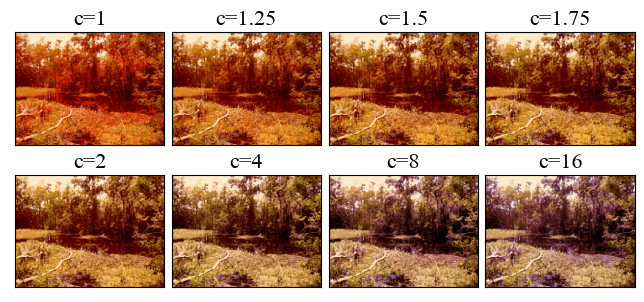

In [10]:
cs = [1, 1.25, 1.50, 1.75, 2, 4, 8, 16]
fig1, axs1 = plt.subplots(2, 4, figsize=(8, 3.6))
fig1.subplots_adjust(hspace=0.06, wspace=0.05)
# params = {
#         #  'axes.labelsize': 10,
#          'axes.titlesize':12,
#          "font.family":"Times New Roman"
# }
# plt.rcParams.update(params)
csfont = {'fontname': 'Times New Roman', 'size': 16}

axs1 = axs1.ravel()
X = centers_img1
Y = centers_img2
lambd = 0.1

for k in range(0, len(cs)):
    c = cs[k]
    print("c=", c)
    _, P0, alph, bet = ss_ipot_non_uniform(
        X, Y, mu, nu, c, lambd, max_outer_iter, max_inner_iter, return_map=True)
    # u = np.sum(P0, axis=0, keepdims=1).T
    P = P0
    # print(np.linalg.norm(u[u>1/L]-1/L, ord = 1))
    # uf = feasible_proj(u, L)
    # P = round_transpoly(P0, mu, uf)
    # P[P<0] = 0

    r = np.sum(P, axis=1, keepdims=1)
    # c = np.sum(P,axis = 0, keepdims=1).T

    ratio_r = np.divide(P, r, np.ones_like(P), where=~np.isclose(r, 0))
    mapped_image1 = np.zeros(img1_.shape)
    centroid_mappings1 = (ratio_r@centers_img2)

    for i in range(0, centroid_mappings1.shape[0]):
            mapped_image1[img1_clusters.labels_ == i] = centroid_mappings1[i]

    axs1[k].imshow(mapped_image1.reshape(img1.shape))
    # title = "c = " + str(cs[k])
    axs1[k].xaxis.set_visible(False)
    axs1[k].yaxis.set_visible(False)
    # axs1[k].title.set_text(title)
    axs1[k].set_title("c="+str(c), **csfont)


fig1.savefig("woods_to_autumn_ipot_source.pdf", dpi=500, bbox_inches = 'tight', pad_inches = 0, format='pdf')
fig1.savefig("woods_to_autumn_ipot_source.svg", dpi=500, bbox_inches = 'tight', pad_inches = 0, format='svg')
fig1.savefig("woods_to_autumn_ipot_source.png", dpi=500, bbox_inches = 'tight', pad_inches = 0, format='png')
fig1.show
        
        

$\mathbf{Y} \rightarrow Woods \\
\mathbf{X} \rightarrow Autumn$

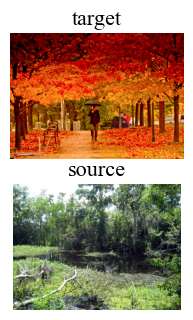

In [11]:
# img1 is target imgage
# img2 is source image

fig, axs = plt.subplots(2, 1, figsize=(3, 3.6))
fig1.subplots_adjust(hspace=0.05, wspace=0.05)

axs = axs.ravel()
img2 = image.imread("woods.jpg")
img1 = image.imread("autumn.jpg")


font = font_manager.FontProperties(family="Times New Roman",
                                   weight='normal',
                                   style='normal', size=16)
# csfont = {'fontname': 'Times New Roman', 'fontsize': 14}
# csfont = {'fontname': 'Times New Roman', 'size': 16}

axs[0].imshow(img1)
axs[0].axis("off")
axs[0].set_title("target", **csfont)
# axs[0].set_box_aspect(1)

axs[1].imshow(img2)
axs[1].axis("off")
axs[1].set_title("source", **csfont)
# axs[1].set_box_aspect(1)

fig.savefig("autumn_to_woods.pdf", dpi=500, bbox_inches='tight', pad_inches=0,  format='pdf')
fig.savefig("autumn_to_woods.svg", dpi=500, bbox_inches='tight', pad_inches=0,  format='svg')
fig.savefig("autumn_to_woods.png", dpi=500, bbox_inches='tight', pad_inches=0,  format='png')


In [12]:
n_colors1 = 128
n_colors2 = 128
img1_ = img1.reshape(-1, 3)/255
img1_clusters = KMeans(n_clusters=n_colors1, n_init=1,
                       max_iter=100,  random_state=42).fit(img1_)

hist_img1 = np.bincount(img1_clusters.labels_)
hist_img1 = hist_img1/np.sum(hist_img1)


img2_ = img2.reshape(-1, 3)/255
img2_clusters = KMeans(n_clusters=n_colors2, n_init=1, max_iter=100).fit(img2_)

hist_img2 = np.bincount(img2_clusters.labels_)
hist_img2 = hist_img2/np.sum(hist_img2)

centers_img1 = img1_clusters.cluster_centers_
centers_img2 = img2_clusters.cluster_centers_


c= 1
c= 1.25
c= 1.5
c= 1.75
c= 2
c= 4
c= 8
c= 16


<bound method Figure.show of <Figure size 800x360 with 8 Axes>>

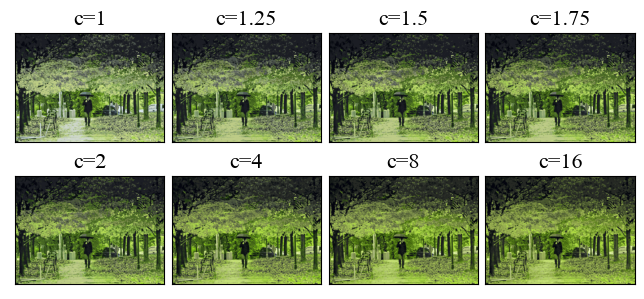

In [13]:
cs = [1, 1.25, 1.50, 1.75, 2, 4, 8, 16]
fig1, axs1 = plt.subplots(2, 4, figsize=(8, 3.6))
fig1.subplots_adjust(hspace=0.06, wspace=0.05)
# params = {
#         #  'axes.labelsize': 10,
#          'axes.titlesize':12,
#          "font.family":"Times New Roman"
# }
# plt.rcParams.update(params)
csfont = {'fontname': 'Times New Roman', 'size': 16}

axs1 = axs1.ravel()
X = centers_img1
Y = centers_img2
lambd = 0.1

for k in range(0, len(cs)):
    c = cs[k]
    print("c=", c)
    _, P0, alph, bet = ss_ipot_non_uniform(
        X, Y, mu, nu, c, lambd, max_outer_iter, max_inner_iter, return_map=True)
    # u = np.sum(P0, axis=0, keepdims=1).T
    P = P0
    # print(np.linalg.norm(u[u>1/L]-1/L, ord = 1))
    # uf = feasible_proj(u, L)
    # P = round_transpoly(P0, mu, uf)
    # P[P<0] = 0

    r = np.sum(P, axis=1, keepdims=1)
    # c = np.sum(P,axis = 0, keepdims=1).T

    ratio_r = np.divide(P, r, np.ones_like(P), where=~np.isclose(r, 0))
    mapped_image1 = np.zeros(img1_.shape)
    centroid_mappings1 = (ratio_r@centers_img2)

    for i in range(0, centroid_mappings1.shape[0]):
            mapped_image1[img1_clusters.labels_ == i] = centroid_mappings1[i]

    axs1[k].imshow(mapped_image1.reshape(img1.shape))
    # title = "c = " + str(cs[k])
    axs1[k].xaxis.set_visible(False)
    axs1[k].yaxis.set_visible(False)
    # axs1[k].title.set_text(title)
    axs1[k].set_title("c="+str(c), **csfont)


fig1.savefig("autumn_to_woods_ipot_source.pdf", dpi=500, bbox_inches = 'tight', pad_inches = 0, format='pdf')
fig1.savefig("autumn_to_woods_ipot_source.svg", dpi=500, bbox_inches = 'tight', pad_inches = 0, format='svg')
fig1.savefig("autumn_to_woods_ipot_source.png", dpi=500, bbox_inches = 'tight', pad_inches = 0, format='png')
fig1.show
        
        